# Исследование набора данных `Firewall.csv`

## Подготовка к исследованию

### Импортирование необходимых библиотек:

Для эффективной работы с набором данных используется библиотека `pandas`.

In [1]:
import pandas as pd

Для работы с визуализацией используется библиотека `seaborn`.

In [2]:
import seaborn as sns

Для сохранения графиков импортируется модуль `pyplot` из библиотеки `matplotlib`:

In [3]:
import matplotlib.pyplot as plt

`Seaborn` выводит предупреждения в консоль. Для отключения используется библиотека `warnings` с применением метода `filterwarnings`:

In [4]:
import warnings
warnings.filterwarnings("ignore")

### Считывание информации из набора данных в структуру `DataFrame`

В качестве набора данных используется [./data_sets/Firewall.csv](./data_sets/Firewall.csv)

Источник: [kaggle.com](https://www.kaggle.com/datasets/sgd825344491/internet-firewall)

In [5]:
data = pd.read_csv("data_sets/Firewall.csv")

### Проверка полученной информации

Для проверки инфрмации на отсутствие пропусков используется метод `info`.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


Из полученной информации можно сделать вывод, что данные:
* содержат `65532` записи с индексами от `0` до `65531`;
* содержат `12` колонок;
* не имеют записей с пропущенными данными;
* содержат колонку `Action` с типом `object`, а остальные колонки  - `int64`;

### Описание полученной информации

Данные являются журналом работы брандмауэра.

Вывод первых строк данных:

In [7]:
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


Данные содержат информацию, разделенную на следующие столбцы:
* `Source Port` - порт источника;
* `Destination Port` - порт назначения;
* `NAT Source Port` - порт источника `NAT`;
* `NAT Destination Port` - порт назначения `NAT`;
* `Action` - действие (`allow`, `deny`, `drop`, `reset-both`);
* `Bytes` - количество байтой переданных по указанному соединению;
* `Bytes sent` - количество отправленных байтов;
* `Bytes Received` - количество принятых байтов;
* `Packets` - количество пакетов переданных по указанному соединению;
* `Elapsed Time (sec)` - время затраченное на передачу пакетов (в секундах);
* `pkts_sent` - количество отправленных пакетов;
* `pkts_received` - количество принятых пакетов.

## Исследование

### Анализ действий брандмауэра

#### Максимальные, минимальные и средние значения (в байтах) для действий брандмауэра

In [8]:
data_max_bytes = data[["Action", "Bytes"]].groupby("Action").max()
data_min_bytes = data[["Action", "Bytes"]].groupby("Action").min()
data_mean_bytes = data[["Action", "Bytes"]].groupby("Action").mean()

print("Максимальные значения:", data_max_bytes, sep="\n")
print("\nМинимальные значения:", data_min_bytes, sep="\n")
print("\nСредние значения:", data_mean_bytes, sep="\n")

Максимальные значения:
                 Bytes
Action                
allow       1269359015
deny              1850
drop                70
reset-both         293

Минимальные значения:
            Bytes
Action           
allow          60
deny           60
drop           66
reset-both     62

Средние значения:
                    Bytes
Action                   
allow       169037.953241
deny            83.211717
drop            68.675278
reset-both     157.351852


Так как разрыв между максимальным и минимальным значениями слишком большой (более чем в 20 млн раз) для анализа будет взята выборка ограниченная средним значением:

In [9]:
data = data[data["Bytes"] < data.Bytes.mean()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63924 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           63924 non-null  int64 
 1   Destination Port      63924 non-null  int64 
 2   NAT Source Port       63924 non-null  int64 
 3   NAT Destination Port  63924 non-null  int64 
 4   Action                63924 non-null  object
 5   Bytes                 63924 non-null  int64 
 6   Bytes Sent            63924 non-null  int64 
 7   Bytes Received        63924 non-null  int64 
 8   Packets               63924 non-null  int64 
 9   Elapsed Time (sec)    63924 non-null  int64 
 10  pkts_sent             63924 non-null  int64 
 11  pkts_received         63924 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.3+ MB


#### Анализ полного трафика

Для анализа полного трафика выводится отношение байтов к пакетам, при помощи цвета отображаются действия брандмауэра.

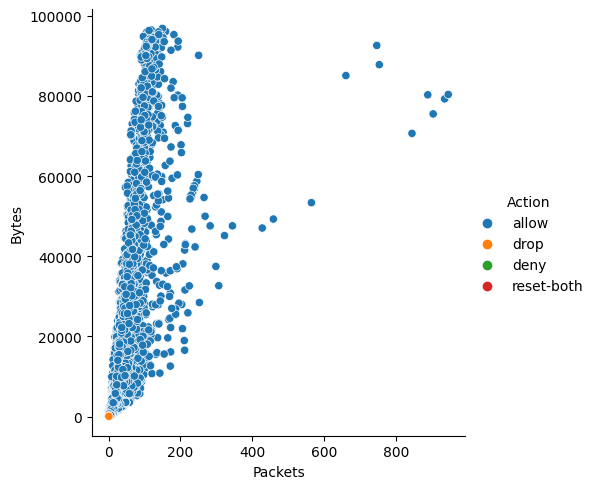

In [10]:
# Создаем график
sns.relplot(
    data = data,  # Добавляем данные для отображения

    # Определяем переменные, определяющие положение по осям X и Y
    x = "Packets",  # Опредеяем значения оси X
    y = "Bytes",  # Определяем значения оси Y
    hue = "Action"
)
plt.savefig("media/all_data.jpg")

На графики видно, что действия брандмауэра, отличные от `allow`, минимальные. 

#### Анализ `deny` трафика

Рассмотрим более подробно трафик который был отклонен:

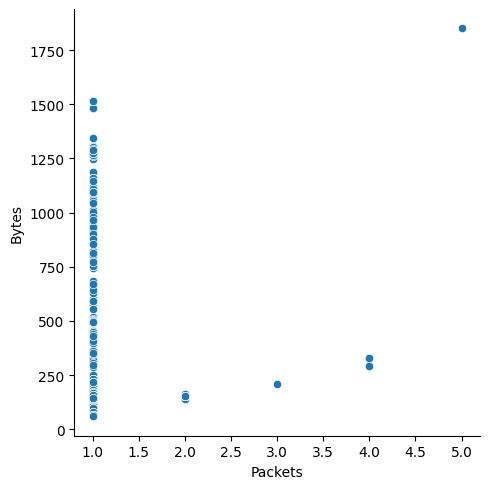

In [11]:

# Фильтруем данные
data_deny = data[data["Action"] == "deny"]

# Создаем график
sns.relplot(
    data = data_deny,  # Добавляем данные для отображения
    # Определяем переменные, определяющие положение по осям X и Y
    x = "Packets",  # Опредеяем значения оси X
    y = "Bytes",  # Определяем значения оси Y
)

plt.savefig("media/deny_data.jpg")

Из графика видно, что почти все данные, отклоненные брандмауэром, являются однопакетными, не превышающие `2Кб`. Из этого можно сделать вывод, что атаки на брандмауэр в исследуемом журнале не было .